Análisis exploratorio descriptivo sobre la violencia en Honduras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se carga la base de datos

datos = pd.read_excel('datasets/data_cts_intentional_homicide.xlsx', skiprows=2)
print(datos.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  VALUE Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


In [3]:
# Se filtran unicamente los datos de Honduras y se elimina la base de UNOCD del entorno para optimizar la memoria RAM

honduras = datos[datos['Country'] == 'Honduras']
print(honduras.head(2))

del datos

   Iso3_code   Country    Region                        Subregion  \
7        HND  Honduras  Americas  Latin America and the Caribbean   
27       HND  Honduras  Americas  Latin America and the Caribbean   

                                            Indicator       Dimension  \
7   Persons arrested/suspected for intentional hom...  by citizenship   
27  Persons arrested/suspected for intentional hom...  by citizenship   

             Category   Sex    Age  Year Unit of measurement   VALUE Source  
7   National citizens  Male  Total  2013              Counts   905.0    CTS  
27  National citizens  Male  Total  2014              Counts  1319.0    CTS  


In [4]:
# Se establece un ciclo for para recorrer las columnas de la base de datos y mostrar los valores únicos de cada una

for col in honduras.columns:
    print(f'columna: {col}')
    print(honduras[col].unique())

columna: Iso3_code
['HND']
columna: Country
['Honduras']
columna: Region
['Americas']
columna: Subregion
['Latin America and the Caribbean']
columna: Indicator
['Persons arrested/suspected for intentional homicide'
 'Victims of intentional homicide'
 'Victims of intentional homicide – City-level data'
 'Persons convicted for intentional homicide'
 'Death due to intentional homicide in prison']
columna: Dimension
['by citizenship' 'Total' 'by relationship to perpetrator'
 'by situational context' 'by mechanisms' 'by location']
columna: Category
['National citizens' 'Foreign citizens' 'Total'
 'Intimate partner or family member'
 'Intimate partner or family member: Intimate partner'
 'Intimate partner or family member: Family member'
 'Other Perpetrator known to the victim'
 'Perpetrator unknown to the victim'
 'Perpetrator to victim relationship unknown'
 'Organized criminal groups or gangs' 'Other criminal activities'
 'Interpersonal homicide' 'Socio-political homicide'
 'Socio-politic

In [5]:
honduras = honduras.drop(columns=['Iso3_code', 'Country', 'Region', 'Subregion'])
print(honduras.head())

                                             Indicator       Dimension  \
7    Persons arrested/suspected for intentional hom...  by citizenship   
27   Persons arrested/suspected for intentional hom...  by citizenship   
56   Persons arrested/suspected for intentional hom...  by citizenship   
94   Persons arrested/suspected for intentional hom...  by citizenship   
219  Persons arrested/suspected for intentional hom...  by citizenship   

              Category   Sex    Age  Year Unit of measurement   VALUE Source  
7    National citizens  Male  Total  2013              Counts   905.0    CTS  
27   National citizens  Male  Total  2014              Counts  1319.0    CTS  
56   National citizens  Male  Total  2015              Counts  1879.0    CTS  
94   National citizens  Male  Total  2016              Counts  1682.0    CTS  
219  National citizens  Male  Total  2019              Counts  1561.0    CTS  


In [6]:
# Se filtran los datos sobre cada tipo de indicador usando un ciclo for y asignando un número a cada uno

dataframes = {}

for idx, i in enumerate(honduras['Indicator'].unique(), start=1):
    dataframes[idx] = honduras[honduras['Indicator'] == i]

In [7]:
# Se nombran los dataframes acorde a los nombres de los indicadores

arrestos = dataframes[1]
homicidios = dataframes[2]
homicidios_ciudad = dataframes[3]
presos = dataframes[4]
muertes_prision = dataframes[5]

Análisis de los *arrestos*

In [8]:
# Se analizan las frecuencias de la base de datos sobre arrestos

for col in arrestos.columns:
    print(f'columna: {col}')
    print(arrestos[col].unique())

columna: Indicator
['Persons arrested/suspected for intentional homicide']
columna: Dimension
['by citizenship' 'Total']
columna: Category
['National citizens' 'Foreign citizens' 'Total']
columna: Sex
['Male' 'Female']
columna: Age
['Total' 'Unknown' '0-9' '10 -14' '15 -17' '18-19' '20-24' '25-29' '30-44'
 '45-59' '60 and older']
columna: Year
[2013 2014 2015 2016 2019 2020 2021 2022 2018]
columna: Unit of measurement
['Counts' 'Rate per 100,000 population']
columna: VALUE
[9.05000000e+02 1.31900000e+03 1.87900000e+03 1.68200000e+03
 1.56100000e+03 1.16900000e+03 1.24800000e+03 1.23300000e+03
 1.80000000e+01 3.70000000e+01 5.80000000e+01 5.00000000e+01
 3.30000000e+01 4.10000000e+01 3.50000000e+01 4.50000000e+01
 5.00000000e+00 1.30000000e+01 6.00000000e+00 8.00000000e+00
 1.00000000e+01 1.60000000e+01 0.00000000e+00 3.10000000e+01
 4.20000000e+01 5.30000000e+01 1.00000000e+00 4.00000000e+00
 1.20000000e+01 7.00000000e+00 3.00000000e+00 2.00000000e+00
 3.60000000e+01 4.80000000e+01 4.7

In [9]:
# Se realiza el conteo de valores únicos de cada columna

for i in arrestos.columns:
    print(f'columna: {i}')
    print(arrestos[i].value_counts())

columna: Indicator
Indicator
Persons arrested/suspected for intentional homicide    338
Name: count, dtype: int64
columna: Dimension
Dimension
Total             306
by citizenship     32
Name: count, dtype: int64
columna: Category
Category
Total                306
National citizens     16
Foreign citizens      16
Name: count, dtype: int64
columna: Sex
Sex
Male      169
Female    169
Name: count, dtype: int64
columna: Age
Age
0-9             36
18-19           36
20-24           36
25-29           36
30-44           36
45-59           36
60 and older    36
Total           32
Unknown         18
10 -14          18
15 -17          18
Name: count, dtype: int64
columna: Year
Year
2013    38
2014    38
2015    38
2016    38
2019    38
2020    38
2021    38
2022    38
2018    34
Name: count, dtype: int64
columna: Unit of measurement
Unit of measurement
Counts                         212
Rate per 100,000 population    126
Name: count, dtype: int64
columna: VALUE
VALUE
0.000000      65
1.000000 

In [10]:
# Se explora la estructura de los datos sobre arrestos

print('Dimensión:', arrestos['Dimension'].unique())
print('Category:', arrestos['Category'].unique())
print('Sex:', arrestos['Sex'].unique())
print('Age:', arrestos['Age'].unique())
print('Unit of measurement:', arrestos['Unit of measurement'].unique())

Dimensión: ['by citizenship' 'Total']
Category: ['National citizens' 'Foreign citizens' 'Total']
Sex: ['Male' 'Female']
Age: ['Total' 'Unknown' '0-9' '10 -14' '15 -17' '18-19' '20-24' '25-29' '30-44'
 '45-59' '60 and older']
Unit of measurement: ['Counts' 'Rate per 100,000 population']


Primero, realizaremos un análisis sobre totales, conteo general y posteriormente, sobre sexos y edades.

ANOTACIÓN: No se encuentra disponible para el análisis total en Sexo y Edad.

In [11]:
# Se realiza el filtrado de datos para obtener los arrestos totales de hombres

arrestos_total_hombres = arrestos[
    (arrestos['Dimension'] == 'by citizenship') &
    (arrestos['Category'] == 'National citizens') & 
    (arrestos['Sex'] == 'Male') &
    (arrestos['Age'] == 'Total') &
    (arrestos['Unit of measurement'] == 'Counts')
]

print(arrestos_total_hombres)

                                             Indicator       Dimension  \
7    Persons arrested/suspected for intentional hom...  by citizenship   
27   Persons arrested/suspected for intentional hom...  by citizenship   
56   Persons arrested/suspected for intentional hom...  by citizenship   
94   Persons arrested/suspected for intentional hom...  by citizenship   
219  Persons arrested/suspected for intentional hom...  by citizenship   
267  Persons arrested/suspected for intentional hom...  by citizenship   
317  Persons arrested/suspected for intentional hom...  by citizenship   
362  Persons arrested/suspected for intentional hom...  by citizenship   

              Category   Sex    Age  Year Unit of measurement   VALUE Source  
7    National citizens  Male  Total  2013              Counts   905.0    CTS  
27   National citizens  Male  Total  2014              Counts  1319.0    CTS  
56   National citizens  Male  Total  2015              Counts  1879.0    CTS  
94   National cit

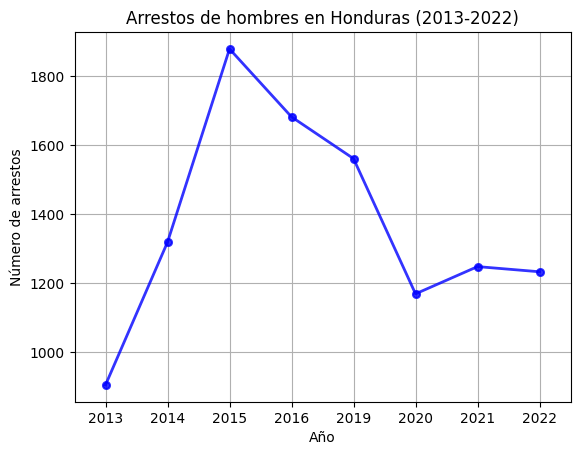

In [12]:
sns.pointplot(x='Year', 
            y='VALUE', 
            data=arrestos_total_hombres,
            alpha=0.8,
            color='blue',
            linewidth=2)

plt.title('Arrestos de hombres en Honduras (2013-2022)')
plt.xlabel('Año')
plt.ylabel('Número de arrestos')
plt.grid()

plt.show()

# Se realiza el análisis sobre los homicidios

In [13]:
for i in homicidios.columns:
    print(f'columna: {i}')
    print(homicidios[i].value_counts())

columna: Indicator
Indicator
Victims of intentional homicide    1208
Name: count, dtype: int64
columna: Dimension
Dimension
Total                             464
by relationship to perpetrator    362
by situational context            216
by mechanisms                     130
by citizenship                     36
Name: count, dtype: int64
columna: Category
Category
Total                                                  464
Intimate partner or family member: Intimate partner     66
Intimate partner or family member: Family member        66
Perpetrator to victim relationship unknown              66
Intimate partner or family member                       66
Other Perpetrator known to the victim                   62
Interpersonal homicide                                  36
Unknown types of homicide                               36
Socio-political homicide - terrorist offences           36
Socio-political homicide                                36
Other criminal activities                  

In [14]:
homicidios_total = homicidios[
    (homicidios['Dimension'] == 'Total') &
    (homicidios['Category'] == 'Total') &
    (homicidios['Sex'] == 'Total') &
    (homicidios['Age'] == 'Total') &
    (homicidios['Unit of measurement'] == 'Rate per 100,000 population')
]

print(homicidios_total)

                             Indicator Dimension Category    Sex    Age  Year  \
63383  Victims of intentional homicide     Total    Total  Total  Total  1990   
63479  Victims of intentional homicide     Total    Total  Total  Total  1991   
63576  Victims of intentional homicide     Total    Total  Total  Total  1992   
63674  Victims of intentional homicide     Total    Total  Total  Total  1993   
63772  Victims of intentional homicide     Total    Total  Total  Total  1994   
63878  Victims of intentional homicide     Total    Total  Total  Total  1995   
64305  Victims of intentional homicide     Total    Total  Total  Total  1999   
64425  Victims of intentional homicide     Total    Total  Total  Total  2000   
64557  Victims of intentional homicide     Total    Total  Total  Total  2001   
64693  Victims of intentional homicide     Total    Total  Total  Total  2002   
64820  Victims of intentional homicide     Total    Total  Total  Total  2003   
64944  Victims of intentiona

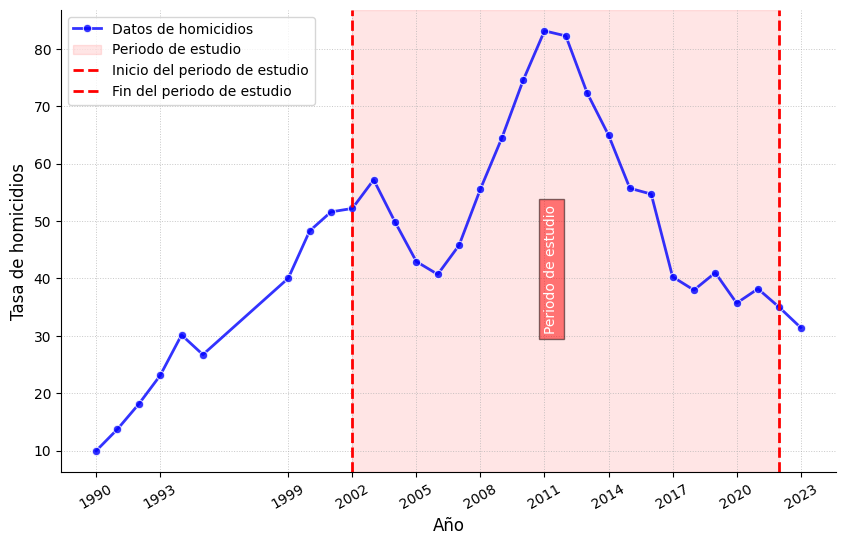

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='VALUE', data=homicidios_total,
             alpha=0.8, color='blue', linewidth=2, marker='o', label='Datos de homicidios')

#plt.title('Tasa de homicidios en Honduras (1990-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de homicidios', fontsize=12)

plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)

plt.axvspan(2002, 2022, color='red', alpha=0.1, label='Periodo de estudio')

plt.axvline(x=2002, color='red', linestyle='--', linewidth=2, label='Inicio del periodo de estudio')
plt.axvline(x=2022, color='red', linestyle='--', linewidth=2, label='Fin del periodo de estudio')

plt.text(x=2011, y=homicidios_total['VALUE'].max() * 0.5,  
         s='Periodo de estudio', color='white', fontsize=10, rotation=90, 
         va='center', bbox=dict(facecolor='red', alpha=0.5))

years = sorted(homicidios_total['Year'].unique())
plt.xticks(ticks=years[::3], rotation=30, fontsize=10)
plt.yticks(fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()

plt.show()

/var/folders/z5/x0d42x394b14041xjcnf6wzh0000gn/T/ipykernel_30744/4225312759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_total['Year'] = homicidios_total['Year'].astype(int)


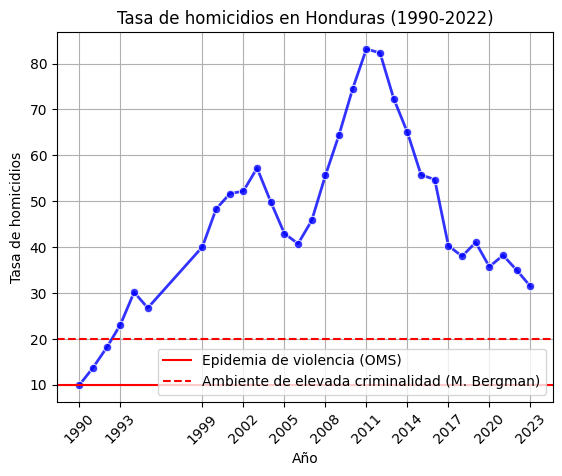

In [ ]:
homicidios_total['Year'] = homicidios_total['Year'].astype(int)

plt

sns.lineplot(x='Year',
             y='VALUE',
             data=homicidios_total,
             alpha=0.8,
             color='blue',
             linewidth=2,
             marker='o')

plt.title('Tasa de homicidios en Honduras (1990-2022)')
plt.xlabel('Año')
plt.ylabel('Tasa de homicidios')
plt.grid()

plt.axhline(y=10, color='red', linestyle='-', linewidth=1.5, label='Epidemia de violencia (OMS)')
plt.axhline(y=20, color='red', linestyle='--', linewidth=1.5, label='Ambiente de elevada criminalidad (M. Bergman)')


years = sorted(homicidios_total['Year'].unique())
plt.xticks(ticks=years[::3], rotation=45)

plt.legend()
plt.show()

# Se realiza el análisis de los presos

In [39]:
for col in presos.columns:
    print(f'columna: {col}')
    print(presos[col].unique())

columna: Indicator
['Persons convicted for intentional homicide']
columna: Dimension
['Total']
columna: Category
['Total']
columna: Sex
['Total']
columna: Age
['Total']
columna: Year
[2011 2015 2016 2019 2020 2021 2022]
columna: Unit of measurement
['Counts' 'Rate per 100,000 population']
columna: VALUE
[861.         319.         400.         514.         272.
 491.         436.          10.08127899   3.45338819   4.24972217
   5.16913661   2.68784252   4.7716802    4.16671764]
columna: Source
['CTS']


In [40]:
tasa_presos = presos[presos['Unit of measurement'] == 'Rate per 100,000 population']
print(tasa_presos)

                                         Indicator Dimension Category    Sex  \
116548  Persons convicted for intentional homicide     Total    Total  Total   
116820  Persons convicted for intentional homicide     Total    Total  Total   
116882  Persons convicted for intentional homicide     Total    Total  Total   
117072  Persons convicted for intentional homicide     Total    Total  Total   
117143  Persons convicted for intentional homicide     Total    Total  Total   
117212  Persons convicted for intentional homicide     Total    Total  Total   
117279  Persons convicted for intentional homicide     Total    Total  Total   

          Age  Year          Unit of measurement      VALUE Source  
116548  Total  2011  Rate per 100,000 population  10.081279    CTS  
116820  Total  2015  Rate per 100,000 population   3.453388    CTS  
116882  Total  2016  Rate per 100,000 population   4.249722    CTS  
117072  Total  2019  Rate per 100,000 population   5.169137    CTS  
117143  Total 

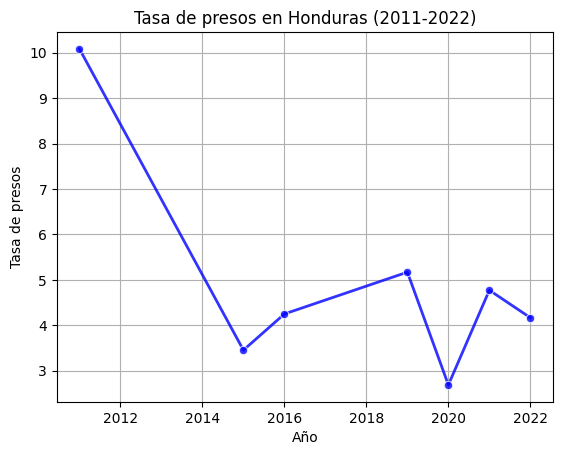

In [41]:
sns.lineplot(x='Year',
            y='VALUE',
            data=tasa_presos,
            alpha=0.8,
            color='blue',
            linewidth=2,
            marker='o')

plt.title('Tasa de presos en Honduras (2011-2022)')
plt.xlabel('Año')
plt.ylabel('Tasa de presos')
plt.grid()

plt.show()

# Se realiza el análisis de las muertes en prisión

In [42]:
for col in muertes_prision.columns:
    print(f'columna: {col}')
    print(muertes_prision[col].unique())

columna: Indicator
['Death due to intentional homicide in prison']
columna: Dimension
['Total']
columna: Category
['Total']
columna: Sex
['Total']
columna: Age
['Total']
columna: Year
[2013 2014 2015 2018 2019 2020 2021 2022]
columna: Unit of measurement
['Counts' 'Rate per 100,000 population']
columna: VALUE
[7.00000000e+00 6.00000000e+00 9.00000000e+00 6.70000000e+01
 1.90000000e+01 1.80000000e+01 7.87465573e-02 6.62023491e-02
 9.74310148e-02 7.16830426e-02 6.73797963e-01 1.87753705e-01
 1.84647503e-01 1.72020453e-01]
columna: Source
['CTS']


In [43]:
muertes_prision_total = muertes_prision[muertes_prision['Unit of measurement'] == 'Counts']

/var/folders/z5/x0d42x394b14041xjcnf6wzh0000gn/T/ipykernel_30744/261836695.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year',


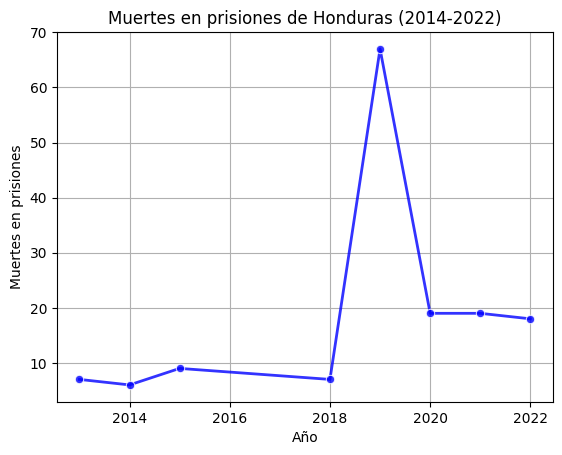

In [44]:
sns.lineplot(x='Year',
            y='VALUE',
            data=muertes_prision_total,
            alpha=0.8,
            color='blue',
            linewidth=2,
            marker='o',
            ci=None)

plt.title('Muertes en prisiones de Honduras (2014-2022)')
plt.xlabel('Año')
plt.ylabel('Muertes en prisiones')
plt.grid()

plt.show()